In [1]:
#Nome: Matheus Rodrigues da Silva Espalaor

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as tr
from matplotlib.patches import Ellipse


In [2]:
#Vamos criar a seguinte matriz
#Retirado do site do numpy :https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
cov = np.array([[6, -3], [-3, 3.5]])
mean = np.array([-1, 3])

def create_gaussian():
  pts = np.random.multivariate_normal(mean, cov, size=800)
  return pts

def plot_gaussian():
  plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5)

  plt.axis('equal')

  plt.grid()

  plt.show()

def get_cov(points):
  return np.cov(points.T)

def get_mean(points):
  return np.mean(points, axis=0)

def get_angle(eigvecs):
  return np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

def get_eig(pts):
  return np.linalg.eigh(get_cov(pts))

def get_width_height(eigvals):
   return 2 * np.sqrt(eigvals)

def plot_gaussian_ellipse(pts):
  eigvals, eigvecs = get_eig(pts)
  width, height = get_width_height(eigvals)
  angle = get_angle(eigvecs)
  print(angle)

  fig, ax = plt.subplots()

  ellipse = Ellipse(xy=get_mean(pts),
                  width=width, height=height,
                  angle=angle, edgecolor='red', fc='None', lw=2)


  ax.add_patch(ellipse)
  ax.scatter(pts[:, 0], pts[:, 1], alpha=0.2)

  origin = get_mean(pts)  # A origem das setas é a média dos dados

# Cada seta é um autovetor multiplicado pela raiz quadrada dos autovalores (variância)
  for i in range(len(eigvals)):
      # Definir a direção e o tamanho das setas (escala pelos autovalores)
      eigval = np.sqrt(eigvals[i])
      eigvec = eigvecs[:, i]

      # Usar quiver para desenhar as setas
      ax.quiver(origin[0], origin[1], eigvec[0]*eigval, eigvec[1]*eigval,
                angles='xy', scale_units='xy', scale=1,
                color='blue', width=0.005, headwidth=3, headlength=5)

      # Desenhar as setas na direção oposta também (visualização simétrica)
      ax.quiver(origin[0], origin[1], -eigvec[0]*eigval, -eigvec[1]*eigval,
                angles='xy', scale_units='xy', scale=1,
                color='blue', width=0.005, headwidth=3, headlength=5)

  # Ajustar os limites do gráfico
  ax.set_xlim(np.min(pts[:, 0]) - 1, np.max(pts[:, 0]) + 1)
  ax.set_ylim(np.min(pts[:, 1]) - 1, np.max(pts[:, 1]) + 1)

  # Mostrar o gráfico
  plt.title('Elipse da Matriz de Distribuição Normal')
  plt.grid(True)
  plt.show()

In [3]:
pts = create_gaussian()

-123.18595317112043


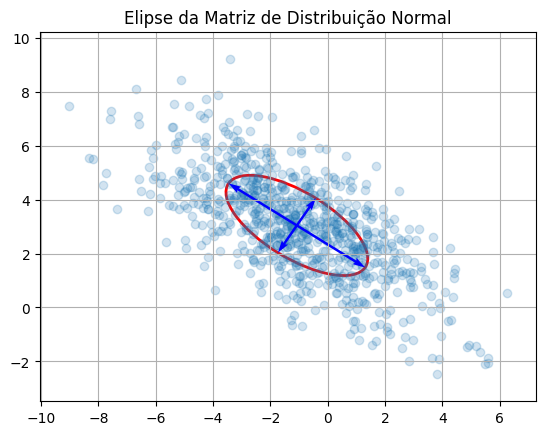

In [4]:
plot_gaussian_ellipse(pts)

Interpretação do gráfico. Aqui queremos ver como os autovalores e autovetores funcionam numa distribuição gaussiana.

Podemos perceber que o maior autovalor tem seu autovetor apontando para o local onde a variância é maior. O segundo autovalor tem seu autovetor apontando para o segundo local de maior variância.

No nosso caso, temos somente dois parâmetros, estamos trabalhando com uma Distribuição Normal Multivariada de duas variáveis aleátorias. Para mais dimensões, o caso continuaria igual.

Referência: https://users.cs.utah.edu/~tch/CS4640F2019/resources/A%20geometric%20interpretation%20of%20the%20covariance%20matrix.pdf

Queremos usar as elipses, pois, se dois pontos estão na mesma elipse, então eles tem a mesma probabilidade de acontecer.
Referência: https://online.stat.psu.edu/stat505/book/export/html/636